In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/RAW/data.csv')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/RAW/data.csv')



print("Columns in the DataFrame:")
print(df.columns)

Columns in the DataFrame:
Index(['Sentence', 'Sentiment'], dtype='object')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Columns in the DataFrame:
Index(['Sentence', 'Sentiment'], dtype='object')


<ipython-input-29-d18bcfaaaf9e>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Predicted Sentiment', palette='viridis')


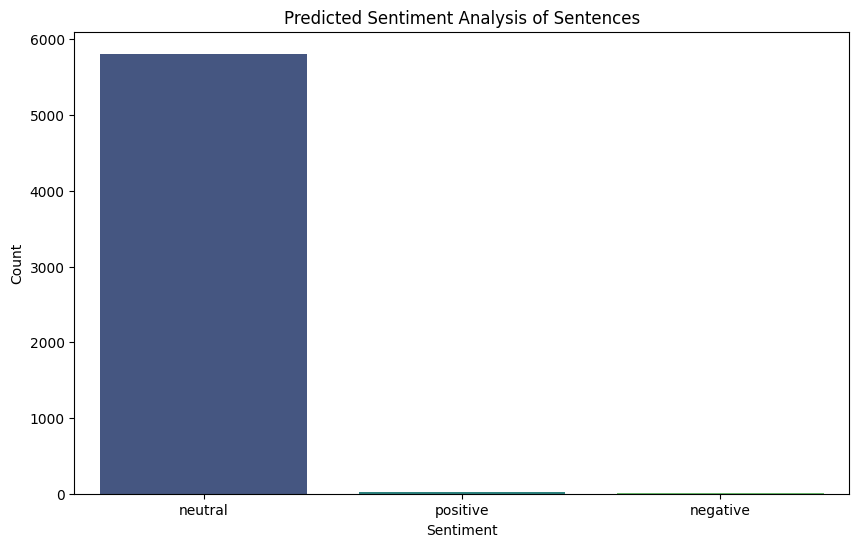

<ipython-input-29-d18bcfaaaf9e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


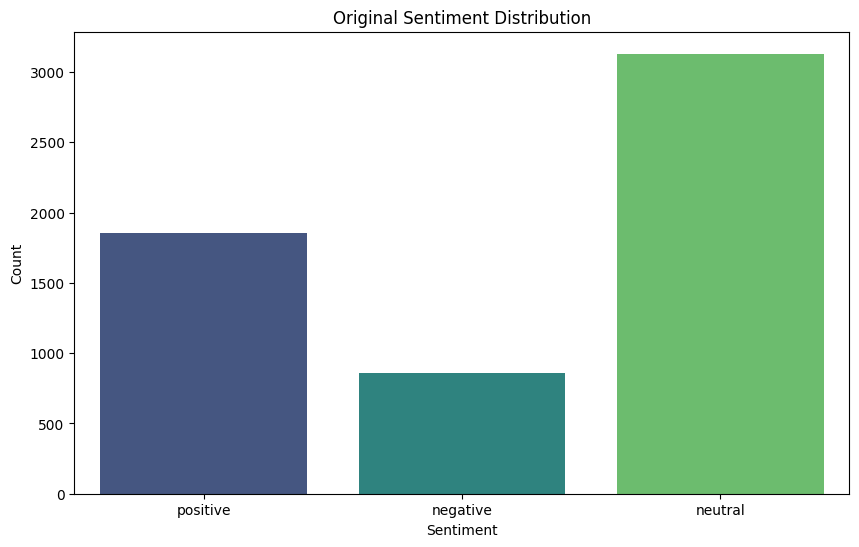

                                               Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5837  RISING costs have forced packaging producer Hu...  negative   
5838  Nordic Walking was first used as a summer trai...   neutral   
5839  According shipping company Viking Line , the E...   neutral   
5840  In the building and home improvement trade , s...   neutral   
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

     Predicted Sentiment  
0                neutral  
1                neutral  
2                neutral  
3                neutral  
4                neutral  
...      

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')


df= pd.read_csv('/content/drive/MyDrive/RAW/data.csv')
print("Columns in the DataFrame:")
print(df.columns)

sia = SentimentIntensityAnalyzer()

def get_sentiment(sentence):
    scores = sia.polarity_scores(sentence)
    if scores['pos'] > scores['neg'] and scores['pos'] > scores['neu']:
        return 'positive'
    elif scores['neg'] > scores['pos'] and scores['neg'] > scores['neu']:
        return 'negative'
    else:
        return 'neutral'


df['Predicted Sentiment'] = df['Sentence'].apply(get_sentiment)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Predicted Sentiment', palette='viridis')
plt.title('Predicted Sentiment Analysis of Sentences')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


print(df[['Sentence', 'Sentiment', 'Predicted Sentiment']])


accuracy = (df['Sentiment'] == df['Predicted Sentiment']).mean()
print(f"Accuracy of sentiment prediction: {accuracy:.2f}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-34-38191a61710d>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Predicted Sentiment', palette='viridis')


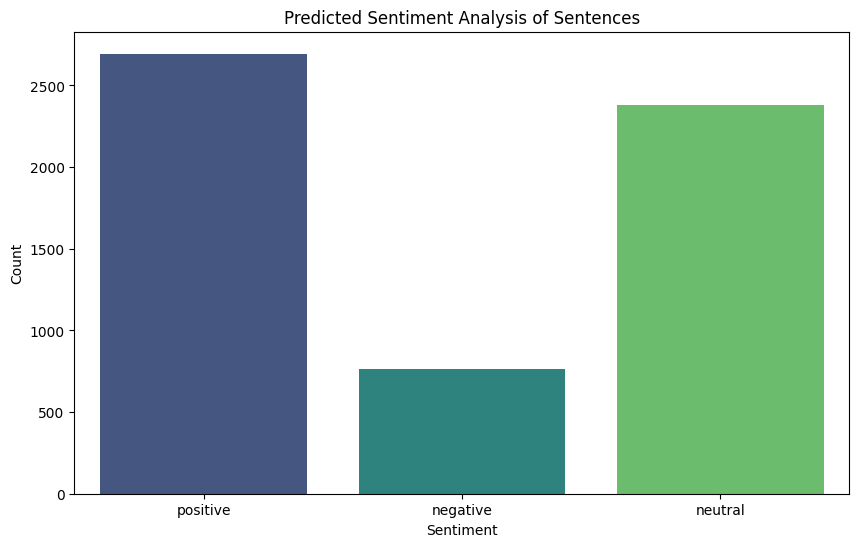

<ipython-input-34-38191a61710d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


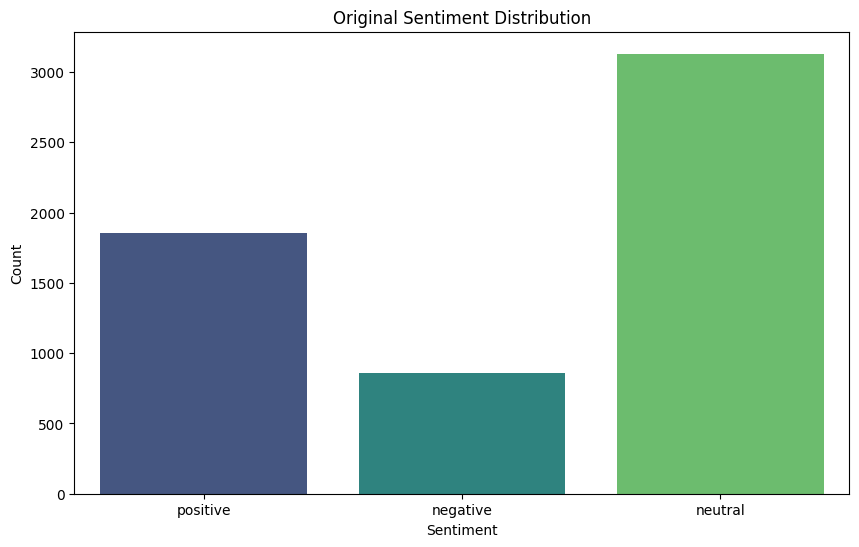

                                               Sentence Sentiment  \
0     The GeoSolutions technology will leverage Bene...  positive   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2     For the last quarter of 2010 , Componenta 's n...  positive   
3     According to the Finnish-Russian Chamber of Co...   neutral   
4     The Swedish buyout firm has sold its remaining...   neutral   
...                                                 ...       ...   
5837  RISING costs have forced packaging producer Hu...  negative   
5838  Nordic Walking was first used as a summer trai...   neutral   
5839  According shipping company Viking Line , the E...   neutral   
5840  In the building and home improvement trade , s...   neutral   
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive   

     Predicted Sentiment  
0               positive  
1               negative  
2               positive  
3                neutral  
4                neutral  
...      

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import re

nltk.download('vader_lexicon')

# Load the data
df= pd.read_csv('/content/drive/MyDrive/RAW/data.csv')

sia = SentimentIntensityAnalyzer()

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def get_sentiment(sentence):
    preprocessed_sentence = preprocess_text(sentence)
    scores = sia.polarity_scores(preprocessed_sentence)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


df['Predicted Sentiment'] = df['Sentence'].apply(get_sentiment)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Predicted Sentiment', palette='viridis')
plt.title('Predicted Sentiment Analysis of Sentences')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


print(df[['Sentence', 'Sentiment', 'Predicted Sentiment']])


accuracy = (df['Sentiment'] == df['Predicted Sentiment']).mean()
print(f"Accuracy of sentiment prediction: {accuracy:.2f}")


from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(df['Sentiment'], df['Predicted Sentiment'])
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(df['Sentiment'], df['Predicted Sentiment']))